## Assignment 8 - Ruggiero Julian

_Regular Expressions_

For this assignment, it is required to use Python regular expression skills, and the starting point for all tasks will be the following text string containing names and phone numbers of some residents of the town of Springfield:

In [2]:
text="""555-1239Moe Szyslak(636) 555-0113Burns, C. Montgomery555 -6542Rev. Timothy Lovejoy555 
8904Ned Flanders636-555-3226Simpson, Homer5553642Dr. Julius Hibbert"""

### Task 1
Extract the names of each individual from the unformatted text string and store them in a vector of some sort. When complete, your vector should contain the following entries:

    "Moe Szyslak"  "Burns, C. Montgomery"  "Rev. Timothy Lovejoy" 
    "Ned Flanders"   "Simpson, Homer"      "Dr. Julius Hibbert"

For this first problem the regular expression defined below checks:
 - __'[A-Za-z]+'__ = 1 or more lowercase characters in the range of [a-z] or uppercase characters in the range of [A-Z].
 - __',?'__ = optional comma.
 - __'\.?'__ = optional dot.
 
Up to this point the first part of the name was built including a point or comma

 - __'\s'__ = whitespace character.
 - __'[A-Za-z]+'__ = 1 or more lowercase characters in the range of [a-z] or uppercase characters in the range of [A-Z].
 - __'\.?'__ = optional dot.
 - __'\s?'__ = optional whitespace. This is because for the case of Moe Szyslak there is nothing after the last name (or second word).
 - __'[A-Za-z]*'__ = 0 or more lowercase characters in the range of [a-z] or uppercase characters in the range of [A-Z].
 
The regular expression is passed to the function 'findall', which searches all substrings where the RE matches, and returns them as a list called task1.

In [3]:
import re
import pandas as pd
task1=re.findall('[A-Za-z]+,?\.?\s[A-Za-z]+\.?\s?[A-Za-z]*',text)
task1

['Moe Szyslak',
 'Burns, C. Montgomery',
 'Rev. Timothy Lovejoy',
 'Ned Flanders',
 'Simpson, Homer',
 'Dr. Julius Hibbert']

### Task 2
Using the new vector containing only the names of the six individuals, complete the following tasks:

    a. Use your regex skills to rearrange the vector so that all elements conform to the standard “firstname lastname”, preserving any titles (e.g., “Rev.”, “Dr.”, etc) or middle/second names.

We can see from the list that the ones that need to be reordered are 'Burns, C. Montgomery' and 'Simpson, Homer'. After rearranging it should be 'C. Montgomery Burns' and 'Homer, Simpson'.
To complete this a new regular expression is defined that will use parenthesis to separate into 2 groups, the last name and the first name with the middle name (if any). A comma separator must be present after the first word (which is the last name), and this is used to identified the 2 cases that needs to be rearrange.

In [4]:
regex=re.compile('([A-Za-z]+),\s([A-Za-z]+\.?\s?[A-Za-z]*)')

- __('[A-Za-z]+')__ = 1 or more lowercase characters in the range of [a-z] or uppercase characters in the range of [A-Z]. This first group is the last name.
- __'\s'__ = whitespace character.
- __([A-Za-z]+\.?\s?[A-Za-z]*)__ = finds any name with optional middle name (with the optional dot and space)

Now a list comprehension is used to apply the new regex to each element, and will only impact on the ones that meets the condition for the regex. Then the sub method is used to get the second group first (using '\2') and then the first group (using '\1') which is the last name. A list called task2_a is returned with the result.
A dataframe 'df' will be created to store the names and will be shown at the end of task 2.

In [5]:
task2_a=[regex.sub(r'\2, \1', item) for item in task1]

In [6]:
df=pd.DataFrame()
df["Name"]=(task2_a)
task2_a

['Moe Szyslak',
 'C. Montgomery, Burns',
 'Rev. Timothy Lovejoy',
 'Ned Flanders',
 'Homer, Simpson',
 'Dr. Julius Hibbert']

    b. Construct a logical vector indicating whether a character has a title (i.e., Rev. and Dr.).

First I create a new series based on pandas Series method, using previous list task2_a. After that, the 'str.contains' function is used and the or ("|") operator to determine if each string element matches either "Rev." or "Dr.". Logical vector is shown in list task2_b_boolean and also stored in the dataframe df.

In [7]:
task2_b = pd.Series(task2_a)
task2_b_boolean=task2_b.str.contains('Rev.|Dr.')
df["Rev. or Dr."]=task2_b_boolean
list(task2_b_boolean)

[False, False, True, False, False, True]

    c. Construct a logical vector indicating whether a character has a middle/second name.

I will define a regex re_spaces that will look for the spaces and then store the number of words for each character. Then, if the character does not contain Rev. or Dr. and a total of 3 or more words means it has a middle name. Similar logic, if the character contains Rev. or Dr. and a total of 4 or more words means it also has a middle name. Result is stored in logical vector middle_name, which is printed and stored as new column in the dataframe df.

In [8]:
re_spaces=re.compile("\\s")
middle_name=[]
for i,value in enumerate(task2_b):
    words=len(re.split(re_spaces,value))
    if task2_b_boolean[i]==False and words >= 3:
        #does not have Dr. or Rev. and have 3 or more words (at least 2 names + 1 last name)
        middle_name.append(True)
        continue
    if task2_b_boolean[i]==True and words >= 4:
        #does have Dr. or Rev. and have 4 or more words (Dr./Rev.+ at least 2 names + 1 last name)
        middle_name.append(True)
        continue
    middle_name.append(False)
df["Middle_Name"]=middle_name    
middle_name

[False, True, False, False, False, False]

Now, the df is shown for better understanding of the data and the logical conditions applied to the names

In [9]:
df

,Name,Rev. or Dr.,Middle_Name
0,Moe Szyslak,False,False
1,"C. Montgomery, Burns",False,True
2,Rev. Timothy Lovejoy,True,False
3,Ned Flanders,False,False
4,"Homer, Simpson",False,False
5,Dr. Julius Hibbert,True,False


### Task 3
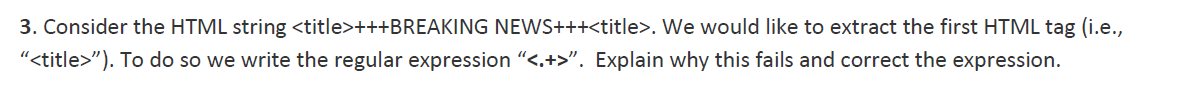

First I confirm  that the regex provided fails, and this is because the default behavior of regular expressions is to be greedy, so with the '+' quantifier it tries to match between 1 and unlimited times, despite a smaller portion would have been sufficient. In this case it extracts the entire string instead of stopping at the first occurrence of the end tag '>'

In [10]:
text3="<title>+++BREAKING NEWS+++<title>"
re.findall("<.+>",text3)

['<title>+++BREAKING NEWS+++<title>']

To correct the expression, I will include a question mark '?' at the end of the pattern in order to use the concept of lazy matching, which means to take as little as possible. Then, the search method is used to retrieve only the first match.

In [11]:
re.search('<.*?>', text3).group()

'<title>'

### Task 4
Consider the string “(5-3)^2=5^2-2*5*3+3^2” conforms to the binomial theorem. We would like to extract the
formula in the string. To do so we write the regular expression “[^0-9=+*()]+”. Explain why this fails and correct the
expression.

For this task, as done previously, first I confirm  that the regex provided fails. This is because with the hat sign '^' the expression is looking for 1 or more characters except the ones listed after it, so it only retrieves the ones that are not excluded, which are '-' and '^'.

In [12]:
text4="(5-3)^2=5^2-2*5*3+3^2"
re.findall("[^0-9=+*()]+",text4)

['-', '^', '^', '-', '^']

To correct this, we include the bar to escape the special character '^' and match it literally, and also add the '-' so the expression will include 1 or more characters that matches the one inside the square brackets [].

In [13]:
re.findall("[\^0-9=+*()-]+",text4)

['(5-3)^2=5^2-2*5*3+3^2']